In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# URL de la página web
url = "https://si3.bcentral.cl/indicadoressiete/secure/Serie.aspx?gcode=IPC&param=UQBSAEYAYwAxAFIARABYADAALQBqAHAAWABKAHEAcQBzAHAAQgB4ADcATwBHAGIAMgBfAEwATgBOAHIAWQA1ACMAZwBsAC4AeABtAEwATQBsAHcAdQBvAGQARwBQAGUARQBvAG0ASwB4AEQAbABTAGgARgAxAGUAQgBxAHkAcwA5AG8ARQAzAGgAMQBPAFQARgBSAEwASABZAE0ARgBKAFoAMwBmAHYATgBoAGMANQBpAE8ANwBFAGMAJAA="


In [3]:
# Realizar la solicitud GET a la página web
response = requests.get(url)

In [4]:
# Crear el objeto BeautifulSoup con el contenido HTML
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
# Encontrar la tabla que contiene los datos (puede requerir inspeccionar el HTML de la página)
table = soup.find("table", {"id": "gr"})

In [6]:
# Crear listas para almacenar los datos
filas = table.find_all("tr")
data = []
for fila in filas:
    cols = fila.find_all(["th", "td"])
    cols = [element.text.strip() for element in cols]
    data.append(cols)

In [7]:
# Crear un DataFrame con los datos
df = pd.DataFrame(data[1:], columns=data[0])

# Imprimir el DataFrame
#print(df)
df

,AÃ±o,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,1928,,,"0,0","2,0","3,9","1,9","0,0","0,0","7,4","-5,2","0,0","-1,8"
1,1929,"-3,7","0,0","0,0","0,0","1,9","3,8","0,0","1,8","3,6","-3,4","1,8","1,7"
2,1930,"-8,6","-1,9","0,0","1,9","1,9","1,8","0,0","0,0","0,0","1,8","0,0","-1,8"
3,1931,"-3,6","-3,8","2,0","-1,9","3,9","1,9","1,8","0,0","0,0","-1,8","0,0","1,8"
4,1932,"-10,9","0,0","4,1","2,0","3,8","1,8","0,0","5,5","12,1","1,5","1,5","1,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2019,"0,1","0,0","0,5","0,3","0,6","0,0","0,2","0,2","0,0","0,8","0,1","0,1"
92,2020,"0,6","0,4","0,3","0,0","-0,1","-0,1","0,1","0,1","0,6","0,7","-0,1","0,3"
93,2021,"0,7","0,2","0,4","0,4","0,3","0,1","0,8","0,4","1,2","1,3","0,5","0,8"
94,2022,"1,2","0,3","1,9","1,4","1,2","0,9","1,4","1,2","0,9","0,5","1,0","0,3"


In [8]:
# Supongamos que tienes un DataFrame llamado df y quieres cambiar el nombre de una columna
# Cambiar el nombre de la columna 'ColumnaActual' a 'NuevoNombreColumna'
df = df.rename(columns={'AÃ±o': 'Año'})

In [9]:
# Verificar los cambios
print(df.head())

    Año  Enero Febrero Marzo Abril Mayo Junio Julio Agosto Septiembre Octubre  \
0  1928                  0,0   2,0  3,9   1,9   0,0    0,0        7,4    -5,2   
1  1929   -3,7     0,0   0,0   0,0  1,9   3,8   0,0    1,8        3,6    -3,4   
2  1930   -8,6    -1,9   0,0   1,9  1,9   1,8   0,0    0,0        0,0     1,8   
3  1931   -3,6    -3,8   2,0  -1,9  3,9   1,9   1,8    0,0        0,0    -1,8   
4  1932  -10,9     0,0   4,1   2,0  3,8   1,8   0,0    5,5       12,1     1,5   

  Noviembre Diciembre  
0       0,0      -1,8  
1       1,8       1,7  
2       0,0      -1,8  
3       0,0       1,8  
4       1,5       1,5  


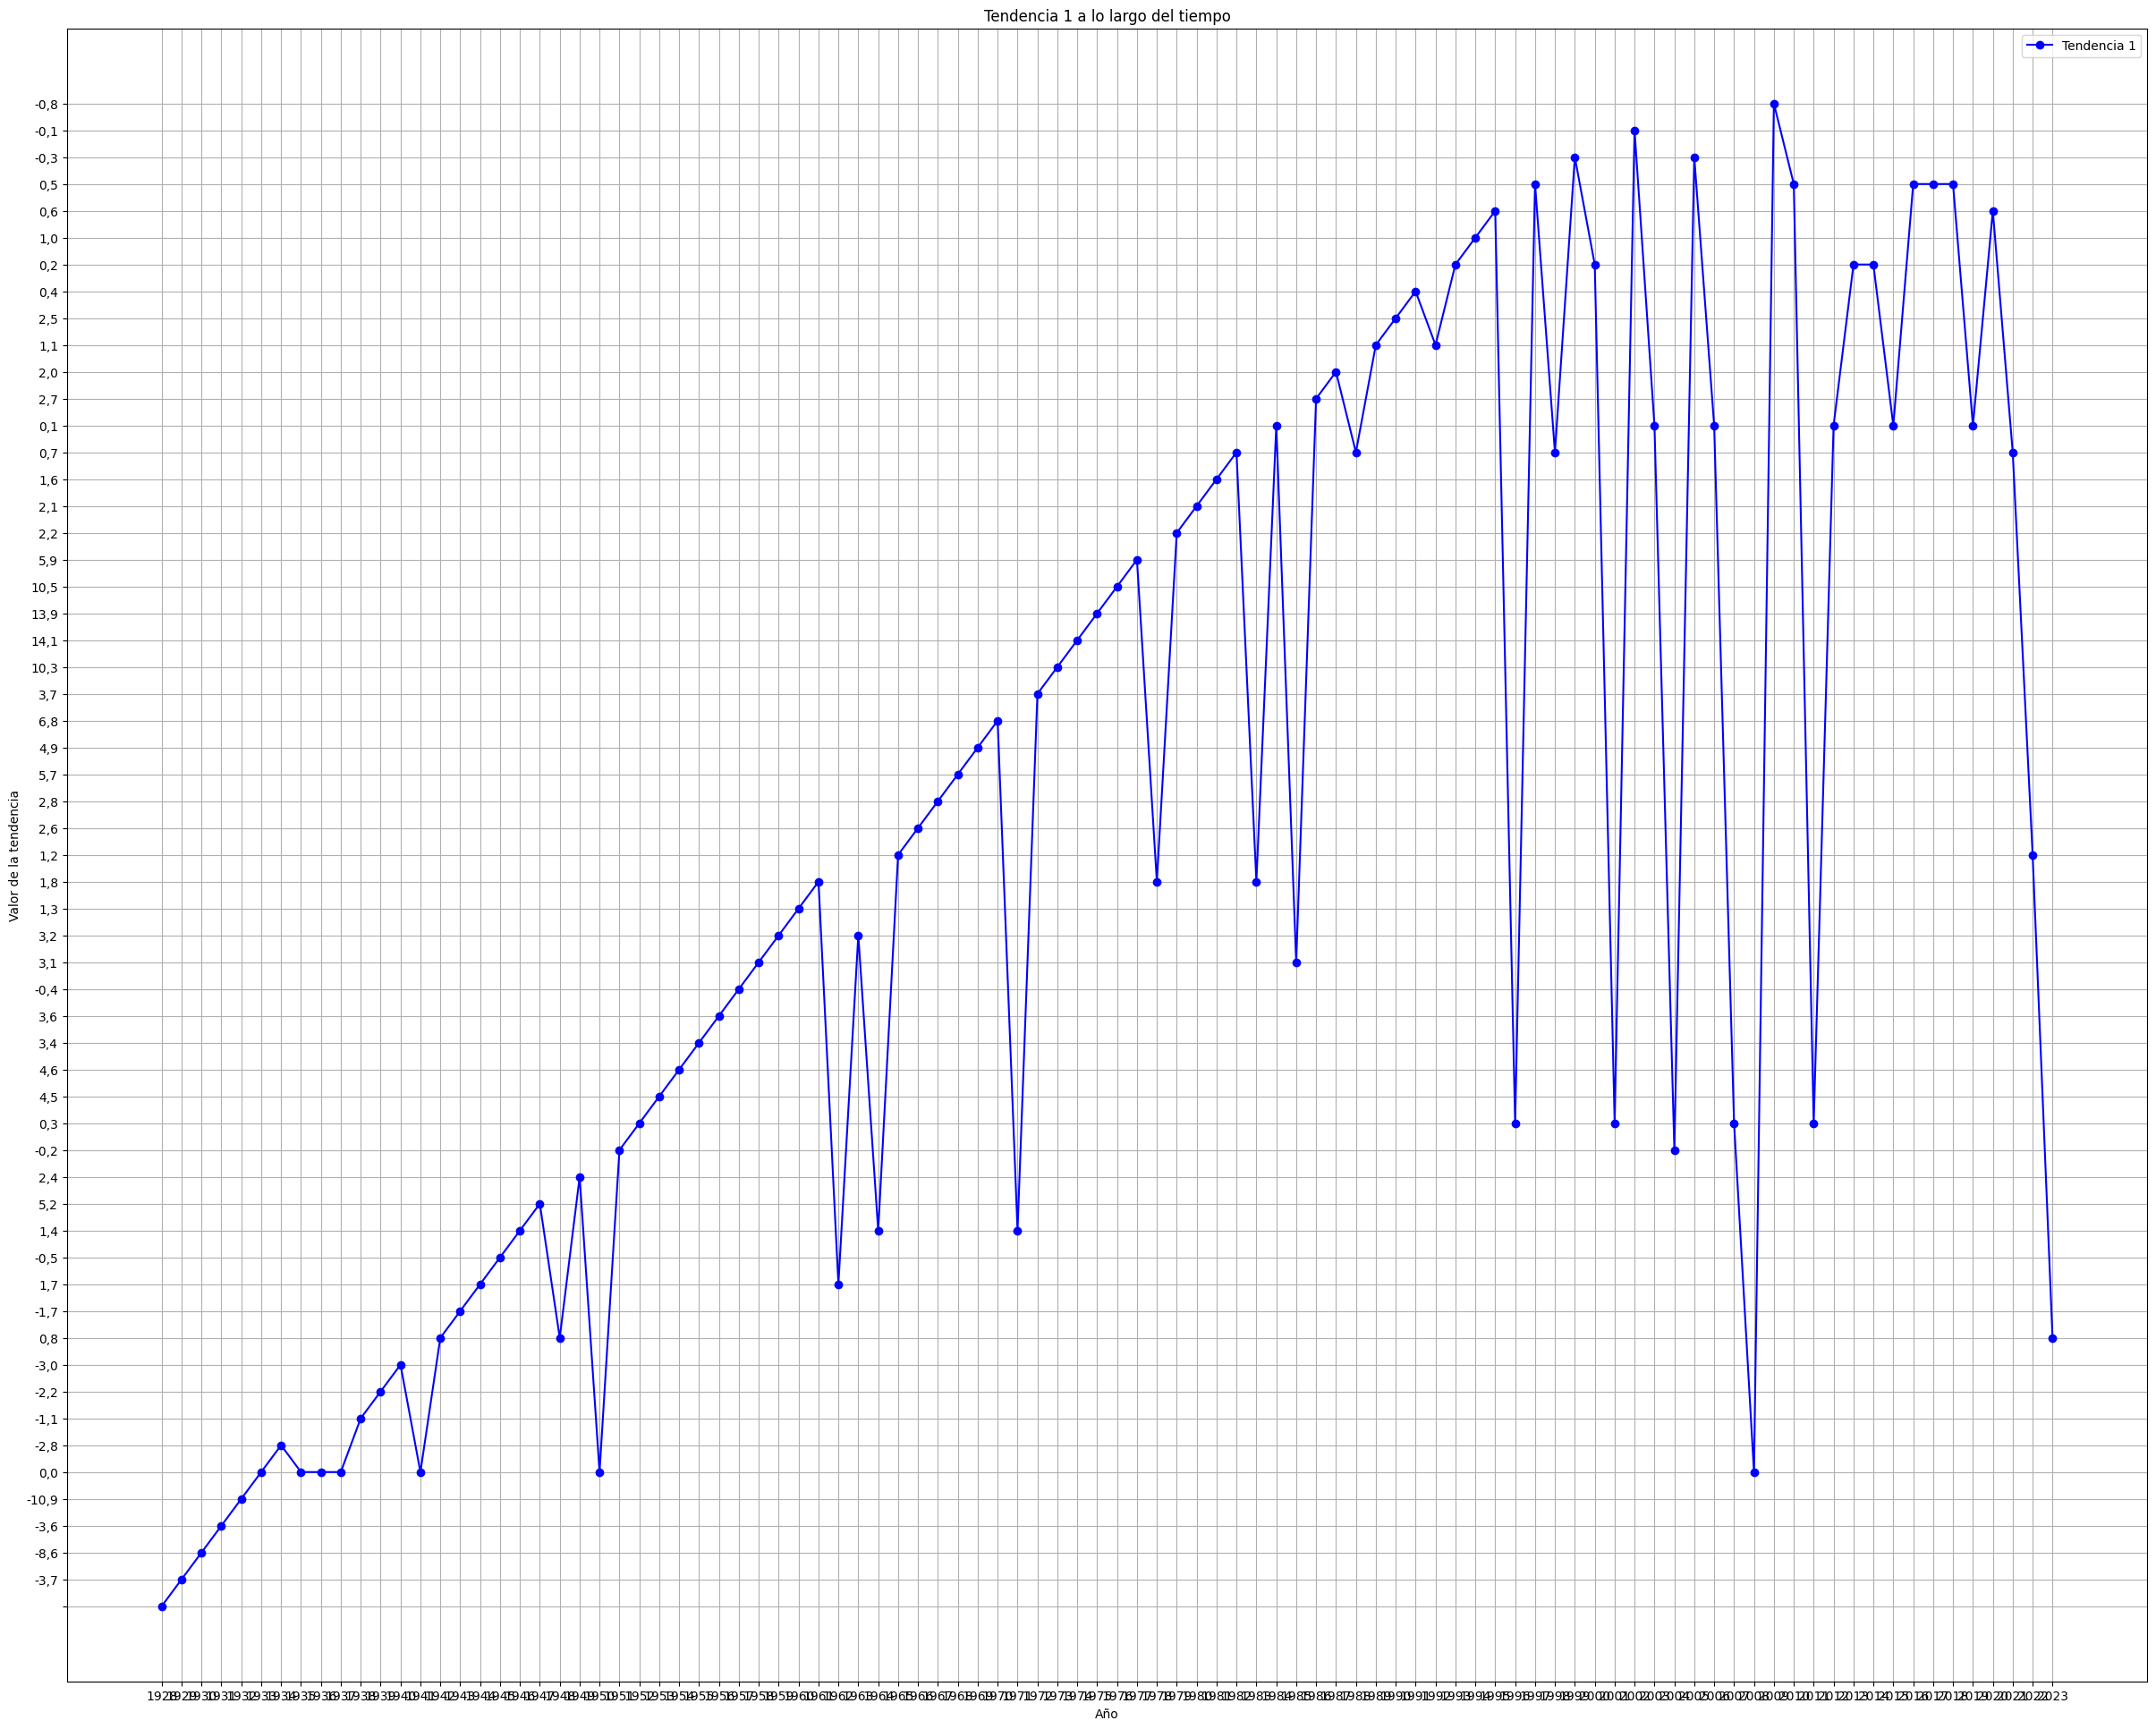

In [10]:
# Supongamos que df es tu DataFrame con las tendencias
# Aquí se asume que tienes una columna 'Año' y otra columna 'Tendencia1', puedes adaptar los nombres según tus datos

# Graficar tendencia 1
plt.figure(figsize=(30, 24))  # Establecer el tamaño del gráfico
plt.plot(df['Año'], df['Enero'], marker='o', linestyle='-', color='b', label='Tendencia 1')
plt.xlabel('Año')
plt.ylabel('Valor de la tendencia')
plt.title('Tendencia 1 a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()